# Convolution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

## Continuous-time Convolution

$x(t)*h(t)=\int_{-\infty}^{+\infty}x(\tau)h(t-\tau)d\tau$

Basic steps in calculating convolution:
- Fix time parameter t
- Reflect (time reverse) $h(\tau)$ to get $h(-\tau)$
- Shift $h(-\tau)$ by parameter $t$ to get $h(t-\tau)$
- Multiply $h(t-\tau)$ with $h(\tau)$
- Integrate the product over all values of $\tau$

### Example 1

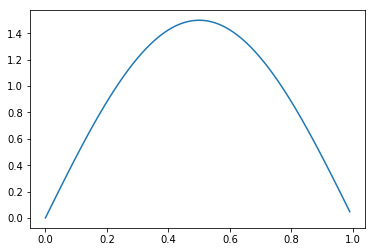

In [2]:
# time scale of signal x(t):
t_min=0
t_max=1
step=0.01
t = np.arange(t_min,t_max,step)
# definition of signal x(t)
x = 1.5*(1*(t>=0)-1*(t>=1))*np.sin(np.pi*t)
plt.plot(t,x)
plt.show()

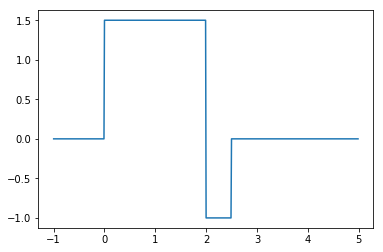

In [3]:
t1_min=-1
t1_max=5
t1 = np.arange(t1_min,t1_max,step)
h = 0*(t1>=-1)+1.5*(t1>=0)-2.5*(t1>=2)+1*(t1>=2.5)
plt.plot(t1,h)
plt.show()

In [4]:
# convolution can be done using signal.convolve() (it is important to specify appropriate mode!):
y = signal.convolve(h,x, mode='valid')*step

# convolve() DOES NOT give us corresponding time instances!
t2 = np.arange(t1_min+t_max,t1_max+0.01,0.01) # in this step we define the time axes for the obtained signal!
# the above expression is not valid for all different intervals of input signals - it is adapted to the specific case above!

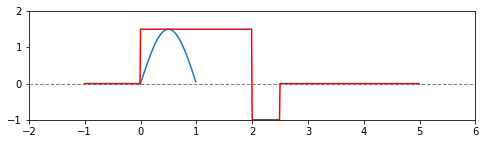

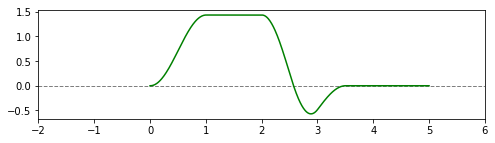

(501, 100, 600)

In [5]:
plt.figure(figsize=(8, 2))
plt.axhline(y=0, alpha=0.5, linewidth=1, color='k', linestyle='--')
plt.xlim(-2,6)
plt.ylim(-1,2)

plt.plot(t,x)
plt.plot(t1,h, 'r')

plt.figure(figsize=(8, 2))
plt.axhline(y=0, alpha=0.5, linewidth=1, color='k', linestyle='--')
#plt.ylim(-50,20)
plt.xlim(-2,6)

plt.plot(t2,y,'g')

plt.show()
len(y),len(x), len(h)

### Example 2

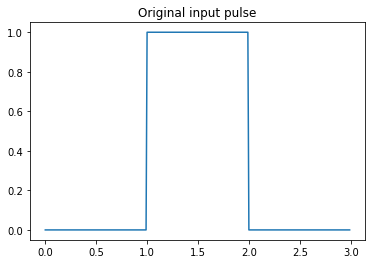

In [6]:
# signal definition:

# time scale definition:
korak=0.01
t_min=0
t_max=3
t = np.arange(t_min,t_max,korak)

sig = 0*(t>=0)+1*(t>=1)-1*(t>=2)

plt.plot(t,sig)

plt.title('Original input pulse')

plt.show()

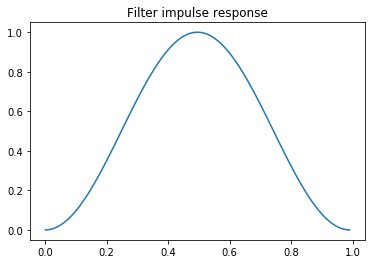

In [7]:
# system impulse response definition:

# time scale definition:
t_h_min=0
t_h_max=1
t_h = np.arange(t_h_min,t_h_max,korak)

h = signal.hann(len(t_h))  # hann window

plt.plot(t_h,h)
plt.title('Filter impulse response')
plt.show()

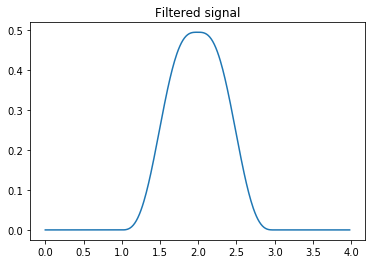

In [8]:
# now we perform the convolution:
filtered = signal.convolve(sig, h, mode='full')*korak

# since the mode is set to "full", we need larger time array than in the previous example:

t_f = np.arange(t_min,t_max+t_h_max-0.01,0.01)
# the above expression is not valid for all different intervals of input signals - it is adapted to the specific case above!

plt.plot(t_f,filtered)
plt.title('Filtered signal')
plt.show()


### Example 3

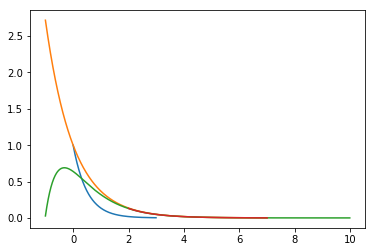

In [9]:
step=0.01
t_x_min=-1
t_x_max=7
t_h_min=0
t_h_max=3

t_h = np.arange(t_h_min,t_h_max,step)
t_x = np.arange(t_x_min,t_x_max,step)

x = np.exp(-t_x)
h = np.exp(-2*t_h)

y_f = signal.convolve(x,h, mode='full')*step

y_v = signal.convolve(x,h, mode='valid')*step

# general expression for obtaining time interval in 'valid' mode (if signal x(t) is at least as large as h(t)):
t_v = np.arange(t_x_min+t_h_max,t_x_max+t_h_min+0.01,0.01)

# general expression for obtaining time interval in 'full' mode:
t_f = np.arange(t_h_min+t_x_min,
                t_h_max+t_x_max-0.01,0.01) # this is calculated from t_h_min+t_x_min+(t_h_max-t_h_min)+(t_x_max-t_x_min)


plt.plot(t_h,h,t_x,x,t_f, y_f,t_v,y_v)
plt.show()


### Example 4

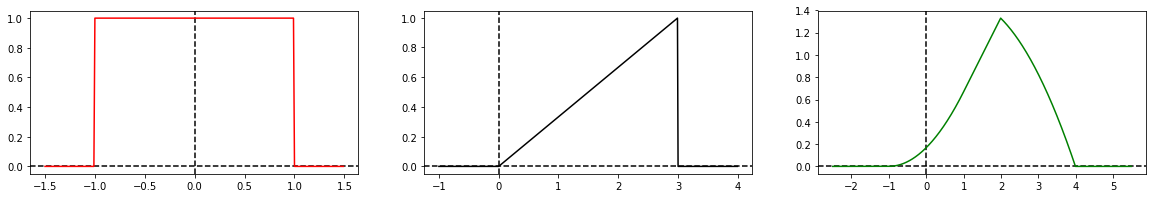

In [10]:
step=0.01
t_x_min=-1.5
t_x_max=1.5
t_h_min=-1
t_h_max=4


t_h = np.arange(t_h_min,t_h_max,step)
t_x = np.arange(t_x_min,t_x_max,step)

x = 0*(t_x>=-1.5)+1*(t_x>=-1)-1*(t_x>=1)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,3))

ax1.axhline(y=0, color = 'k', linestyle='--')
ax1.axvline(x=0, color = 'k', linestyle='--')
ax1.plot(t_x,x,'r')

h = t_h/3*(t_h>=0)-t_h/3*(t_h>=3)

ax2.axhline(y=0, color = 'k', linestyle='--')
ax2.axvline(x=0, color = 'k', linestyle='--')
ax2.plot(t_h,h,'k')

y = np.convolve(x,h)*0.01

t_f = np.arange(t_h_min+t_x_min, t_h_max+t_x_max-0.01,0.01)

ax3.axhline(y=0, color = 'k', linestyle='--')
ax3.axvline(x=0, color = 'k', linestyle='--')
ax3.plot(t_f,y,'g')
plt.show()

### Graphical Representation of Convolution

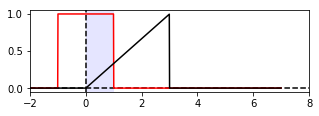

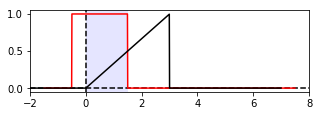

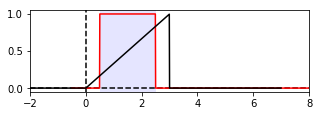

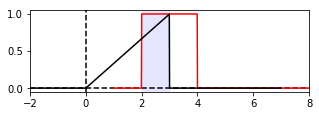

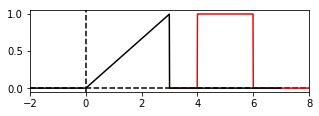

In [11]:
t = np.arange(-2,7,0.01)
x = 0*(t>=-1.5)+1*(t>=-1)-1*(t>=1)
h = t/3*(t>=0)-t/3*(t>=3)

plt.figure(figsize=(5,1.5))
plt.axhline(y=0, color = 'k', linestyle='--')
plt.axvline(x=0, color = 'k', linestyle='--')
plt.plot(t,x,'r')
plt.plot(t,h,'k')
plt.xlim(-2,8)
plt.axvspan(0,1,facecolor='b', alpha = 0.1)

plt.figure(figsize=(5,1.5))
plt.axhline(y=0, color = 'k', linestyle='--')
plt.axvline(x=0, color = 'k', linestyle='--')
plt.plot(t+0.5,x,'r')
plt.plot(t,h,'k')
plt.xlim(-2,8)
plt.axvspan(0,1.5,facecolor='b', alpha = 0.1)

plt.figure(figsize=(5,1.5))
plt.axhline(y=0, color = 'k', linestyle='--')
plt.axvline(x=0, color = 'k', linestyle='--')
plt.plot(t+1.5,x,'r')
plt.plot(t,h,'k')
plt.xlim(-2,8)
plt.axvspan(0.5,2.5,facecolor='b', alpha = 0.1)

plt.figure(figsize=(5,1.5))
plt.axhline(y=0, color = 'k', linestyle='--')
plt.axvline(x=0, color = 'k', linestyle='--')
plt.plot(t+3,x,'r')
plt.plot(t,h,'k')
plt.xlim(-2,8)
plt.axvspan(2,3,facecolor='b', alpha = 0.1)

plt.figure(figsize=(5,1.5))
plt.axhline(y=0, color = 'k', linestyle='--')
plt.axvline(x=0, color = 'k', linestyle='--')
plt.plot(t+5,x,'r')
plt.plot(t,h,'k')
plt.xlim(-2,8)
plt.show()

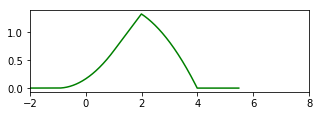

In [12]:
plt.figure(figsize=(5,1.5))
plt.plot(t_f,y,'g')
plt.xlim(-2,8)
plt.show()